## **머신러닝과 딥러닝 기말과제**



2017312875 박지은

### **Data Info**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving covid_19_data.csv to covid_19_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('covid_19_data.csv',encoding ='cp949')

In [ ]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
64128,64129,07/14/2020,Zacatecas,Mexico,2020-07-15 04:34:39,1488.0,145.0,1008.0
64129,64130,07/14/2020,Zakarpattia Oblast,Ukraine,2020-07-15 04:34:39,4055.0,140.0,1301.0
64130,64131,07/14/2020,Zaporizhia Oblast,Ukraine,2020-07-15 04:34:39,622.0,20.0,521.0
64131,64132,07/14/2020,Zhejiang,Mainland China,2020-07-15 04:34:39,1270.0,1.0,1267.0


In [ ]:
df = df[:300]

#### 결측치 처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              300 non-null    int64  
 1   ObservationDate  300 non-null    object 
 2   Province/State   251 non-null    object 
 3   Country/Region   300 non-null    object 
 4   Last Update      300 non-null    object 
 5   Confirmed        300 non-null    float64
 6   Deaths           300 non-null    float64
 7   Recovered        300 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df.isnull()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
295,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

SNo                 0
ObservationDate     0
Province/State     49
Country/Region      0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

In [ ]:
df.drop('Province/State',axis=1).head(3)

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0


In [ ]:
df.head(100)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
95,96,01/24/2020,Anhui,Mainland China,1/24/20 17:00,15.0,0.0,0.0
96,97,01/24/2020,Fujian,Mainland China,1/24/20 17:00,10.0,0.0,0.0
97,98,01/24/2020,Henan,Mainland China,1/24/20 17:00,9.0,0.0,0.0
98,99,01/24/2020,Jiangsu,Mainland China,1/24/20 17:00,9.0,0.0,0.0


#### 연속형 변수 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler
num_att_x = ['Confirmed', 'Deaths','Recovered']

In [ ]:
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df[num_att_x]),columns=num_att_x)

### **Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df2 = df.drop(["ObservationDate", 'Province/State', "Country/Region", "Last Update"], axis = 1)

In [ ]:
df_deaths = df2['Deaths']

In [ ]:
X = df2.drop(["Deaths"],axis=1)
y = df2["Deaths"]

In [ ]:
df2 = pd.concat([df2, df_deaths],axis = 1)

In [ ]:
target = pd.Series(df.Deaths, dtype = "category")
df['Deaths'] = target 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 48)

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
pd.DataFrame(classifier.predict_proba(X_test))

,0,1,2,3,4,5
0,0.960536,0.039464,2.420483e-59,1.428519e-34,1.828211e-17,4.431495e-45
1,0.949937,0.050063,1.168043e-71,1.374563e-41,1.300627e-20,5.092805e-54
2,0.598677,0.401323,4.210909e-131,5.133503e-75,1.428240e-35,1.984860e-97
3,0.974318,0.025682,1.481763e-24,1.007693e-14,6.235821e-08,6.796207e-19
4,0.903845,0.096155,1.135427e-133,5.491367e-77,7.792899e-38,5.060484e-101
...,...,...,...,...,...,...
70,0.948342,0.051658,1.857306e-80,1.282603e-46,3.206234e-23,6.274488e-61
71,0.870062,0.129938,3.436335e-155,2.913226e-89,1.403127e-43,5.456812e-117
72,0.871614,0.128386,6.284181e-158,7.879447e-91,1.888521e-44,3.162619e-119
73,0.839166,0.160834,1.667862e-132,2.947121e-76,4.951312e-36,5.738594e-98


### Decision Tree

In [ ]:
from itertools import combinations

In [ ]:
def get_gini(df, label):
    data = list(df[label].value_counts())
    data2 = [((x / df[label].count()) ** 2) for x in data]
    gini = 1 - sum(data2)
    return gini

In [ ]:
def getEntropy(df, feature) :
    att = df[feature].unique()
    att_list = []
    for i in range(len(att)):    
        att_list.append(len(df[df[feature] == att[i]]) / df[feature].count())
    att_list = np.array(att_list)
    entropy = sum(- att_list * np.log2(att_list))
    return(entropy)

In [ ]:
def getGainA(df, feature) :
    info_D = getEntropy(df, feature) # 목표변수에 대한 Entropy 를 구하기
    columns = list(df.loc[:, df.columns != feature]) # 목표변수(feature)를 제외한 나머지 변수들의 변수명을 리스트 형태로 저장
    gains = []
    for i in range(len(columns)):
        attribute = list(df[columns[i]].unique())
        entropy = []
        for j in range(len(attribute)):
            data = df[df[columns[i]] == attribute[j]]
            entropy.append((len(data) / len(df)) * (getEntropy(data, feature)))
        gains.append(info_D - sum(entropy))
    result = dict(zip(columns, gains))
    return(result)

In [ ]:
print("Country/Region Gini index: ", get_gini(df, "Country/Region"))
print("Province/State Gini index: ", get_gini(df, "Province/State"))

Country/Region Gini index:  0.4942000000000002
Province/State Gini index:  0.9733178838431136


In [ ]:
getEntropy(df, "Country/Region")

2.046519715236317

In [ ]:
getGainA(df, "Country/Region")

{'Confirmed': 0.7490073568909339,
 'Deaths': 0.04957325958587955,
 'Last Update': 0.16315193949691187,
 'ObservationDate': 0.16315193949691187,
 'Province/State': 2.046519715236317,
 'Recovered': 0.08660598780160123,
 'SNo': 2.046519715236317}

### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import rbf_kernel 
from sklearn import metrics

In [ ]:
svc=SVC(kernel='linear', C = 50)

In [ ]:
svc.fit(X, target)

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:') 
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.92


In [ ]:
svc_rbf=SVC(kernel='rbf', gamma = 1) #rbf kernel
svc_rbf.fit(X_train,y_train) # model training
y_pred=svc_rbf.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9066666666666666


In [ ]:
from tqdm import tqdm
from sklearn.model_selection import cross_validate
C_range=list(np.arange(1,80,1))
acc_score = []

In [ ]:
for c in tqdm(C_range): 
    svc = SVC(kernel='rbf', C=c, gamma = 'scale')
    scores = cross_validate(svc, X, y, cv=10, scoring='accuracy')
    score = np.mean(scores['test_score'])
    acc_score.append(score) 
print(np.max(acc_score))
print(C_range[np.argmax(acc_score)])

  0%|          | 0/79 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
  3%|▎         | 2/79 [00:00<00:04, 17.69it/s]/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
  5%|▌         | 4/79 [00:00<00:

0.9133333333333334
1


In [ ]:
print(np.max(acc_score))
print(C_range[np.argmax(acc_score)])

0.9133333333333334
1


Text(0, 0.5, 'Cross-Validated Accuracy')

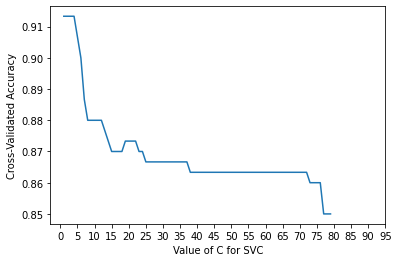

In [ ]:
C_range=list(np.arange(1,80,1))
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,100,5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')